## Praca domowa 4

#### Autor: Mateusz Flis

### Zadanie 1 (1.5 pkt)

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

a)

In [2]:
df.Name[(df.Year > 2015) & (df.NA_Sales < df.EU_Sales) & (df.Publisher == "Nintendo")].to_frame()

,Name
4199,Mario & Sonic at the Rio 2016 Olympic Games
6477,Mario & Sonic at the Rio 2016 Olympic Games
14703,Teddy Together


b)


In [3]:
df[df.Year == 2010].groupby('Genre').Global_Sales.agg('sum').sort_values(ascending = False).reset_index()

,Genre,Global_Sales
0,Action,117.64
1,Misc,96.86
2,Sports,92.53
3,Shooter,77.41
4,Role-Playing,70.52
5,Racing,34.93
6,Platform,31.90
7,Simulation,21.99
8,Adventure,16.57
9,Fighting,14.89


Gry akcji zarobiły najwięcej w 2010 roku.

c)

In [4]:
df1 = df.groupby('Genre').EU_Sales.agg('mean').to_frame()
df2 = df.groupby('Genre').JP_Sales.agg('mean').to_frame()
df1 = df1.merge(df2, on='Genre')
df1 = df1[df1.EU_Sales < df1.JP_Sales].JP_Sales.sort_values(ascending = False).reset_index()
df1[['Genre','JP_Sales']].rename(columns = {'Genre' : 'Typ gry', 'JP_Sales':'Średnia sprzedaż w Japonii'})

,Typ gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


Gry typu role-play, puzzle i strategiczne się lepiej średnio sprzedają w Japonii, niż w Europie

### Zadanie 2 (3.5 pkt)

### Wykorzystałem własną pracę domową numer 2.

### Wykres oryginalny

[Link do wykresu - twitter](https://twitter.com/WhiteHouse/status/1450251658458451974)

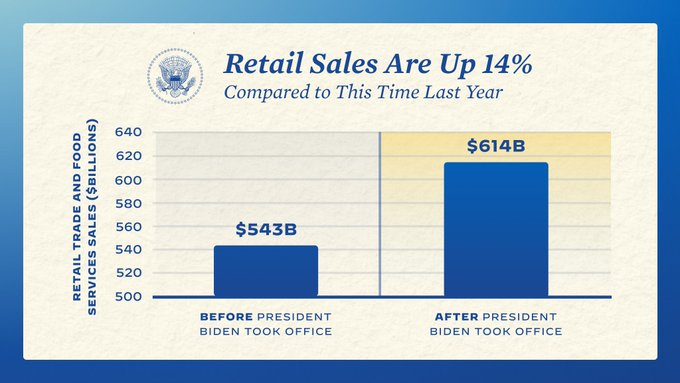

### Poprawiony wykres

[Raport pracy domowej 2](https://github.com/mini-pw/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/FlisMateusz)

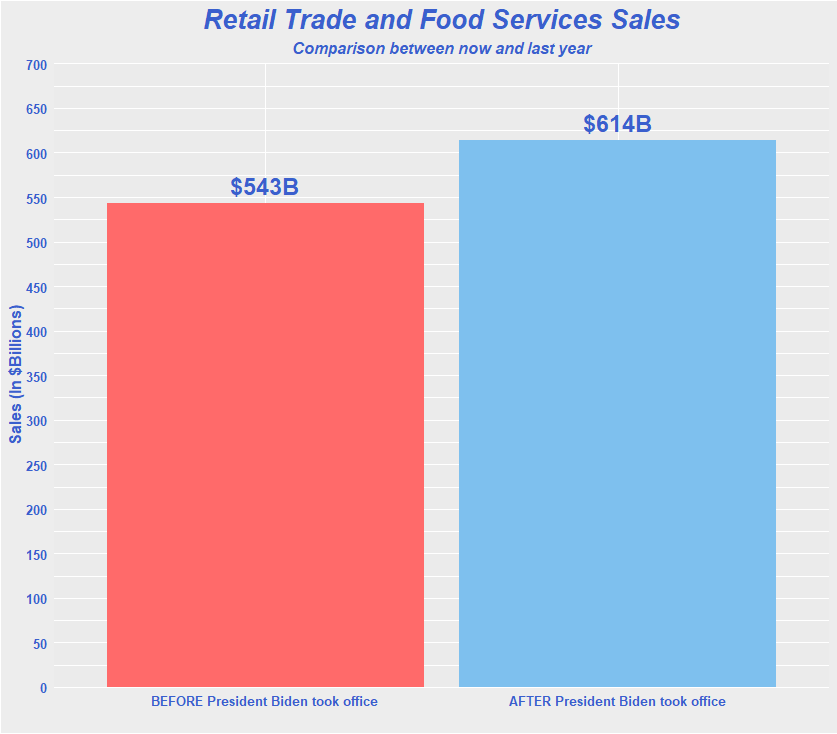

### Wykres stworzony w pythonie

In [5]:
import matplotlib.pyplot as plt

In [6]:
names = ['2020','2021']
values = [543,614]

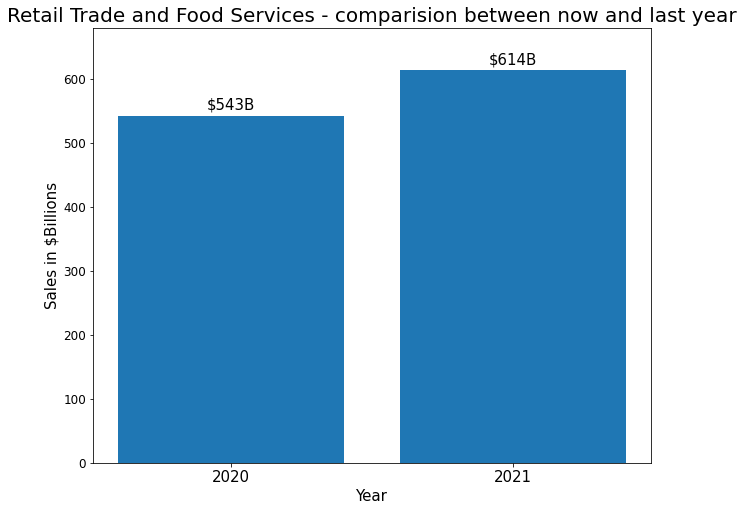

In [7]:
plt.figure(figsize = (10,8))
plt.bar(names,values)
plt.xlabel('Year', size = 15)
plt.ylabel('Sales in $Billions',size = 15)
plt.yticks(size = 12)
plt.xticks(size = 15)
plt.ylim((0,680))
plt.title('Retail Trade and Food Services - comparision between now and last year', size = 20)
for i in range(len(names)):
        plt.text(i,values[i]+10,f"${values[i]}B", size = 15, ha = 'center')
plt.show()

Wykres stworzony w matplotlib jest lepszy od wykresu oryginalnego, ponieważ jego oś y zaczyna się w 0. Dzięki temu jego słupki są proporcjonalne do wartości jakie reprezentują.
Wykres pythonowy jest lepszy od wykresu stworzonego w ggplocie, ponieważ dodatkowo usuwa wszystkie niepotrzebne elementy, tnz. siatka, tło, różnokolorowe słupki, długie nazwy kolumn, kursywa. Zostały tylko najważniejsze informacje, które są potrzebne do zrozumienia wykresu.